In [315]:
import numpy as np
import random
import pandas as pd

In [316]:
A=[[1,-2,-1,0],[-1,-1,0,-1]]
b=[[-4],[-4]]
c=[[-1],[-3],[0],[0]]
A=np.array(A)
b=np.array(b)
c=np.array(c)

x0,y0,s0=[[1],[2],[3],[4]],[[9],[10]],[[5],[6],[7],[8]]



In [317]:
I=np.identity(4)
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [318]:
s0=np.array(s0)
S=np.diag(s0[:,0])
print(S)

[[5 0 0 0]
 [0 6 0 0]
 [0 0 7 0]
 [0 0 0 8]]


In [319]:
x0=np.array(x0)
X=np.diag(x0[:,0])
print(X)

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [320]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [321]:
print(np.hstack((I,S,I)))
print(np.vstack((I,S,I)))

[[1. 0. 0. 0. 5. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 6. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 7. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 8. 0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [5. 0. 0. 0.]
 [0. 6. 0. 0.]
 [0. 0. 7. 0.]
 [0. 0. 0. 8.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [322]:
A
print(A.shape)

(2, 4)


In [323]:
print(A.transpose())
np.size(A)
print(A.transpose().shape)

[[ 1 -1]
 [-2 -1]
 [-1  0]
 [ 0 -1]]
(4, 2)


In [324]:
def createbarA(A,S,X):
    fr=np.hstack((A,np.zeros((2,2)),np.zeros((2,4))))
    sr=np.hstack((np.zeros((4,4)),A.transpose(),np.identity(4)))
    tr=np.hstack((S,np.zeros((4,2)),X))
    barA=np.vstack((fr,sr,tr))
#     print(barA)
    return barA
barA=createbarA(A,S,X)

In [325]:
e=np.ones((4,1))
mu=10

r1=b-A.dot(x0)
r2=c-A.transpose().dot(y0)-s0
r3=mu*e-X.dot(S).dot(e)
r=np.vstack((r1,r2,r3))
print(r1)

[[2]
 [3]]


In [326]:
delta=np.linalg.inv(barA).dot(r)

delta_x=delta[0:4,0].reshape(4,1)
delta_y=delta[4:6,0].reshape(2,1)
delta_s=delta[6:10,0].reshape(4,1)

print("delta_x:\n",delta_x)
print("delta_y:\n",delta_y)
print("delta_s:\n",delta_s)

delta_x:
 [[ 0.84078947]
 [-0.99473684]
 [ 0.83026316]
 [-2.84605263]]
delta_y:
 [[-7.60394737]
 [-1.80789474]]
delta_s:
 [[ 0.79605263]
 [ 1.98421053]
 [-5.60394737]
 [ 0.19210526]]


In [327]:
alpha_p,alpha_d=0.0001,0.0001
x0=x0+alpha_p*delta_x
y0=y0+alpha_d*delta_y
s0=s0+alpha_d*delta_s

print("x0:\n",x0)
print("y0:\n",y0)
print("s0:\n",s0)

x0:
 [[1.00008408]
 [1.99990053]
 [3.00008303]
 [3.99971539]]
y0:
 [[8.99923961]
 [9.99981921]]
s0:
 [[5.00007961]
 [6.00019842]
 [6.99943961]
 [8.00001921]]


In [328]:
n=4
mu=x0.transpose().dot(s0)/10/n
print(mu)
mu=(x0.transpose().dot(s0)/10/n)[0,0]
print(mu)

[[1.749925]]
1.7499249983740133


$$
\left\{
\begin{array}{l}
\|Ax-b\|\leq \varepsilon\\
\|A^ty+s-c\|\leq \varepsilon\\
x^ts\leq \varepsilon
\end{array}
\right.
$$

In [329]:
epsilon = 1e-6
print(np.sqrt(r1.transpose().dot(r1)))
print(np.sqrt(r2.transpose().dot(r2)))
print(np.sqrt(r3.transpose().dot(r3)))


[[3.60555128]]
[[19.84943324]]
[[25.17935662]]


In [330]:
def determineStepsize(x,s,delta_x,delta_s,r):
    data_1=[1]
    for i in range(4):
        if delta_x[i,0]<0:
            data_1.append((0.99*x[i,0])/-delta_x[i,0])
    alpha_p=np.min(data_1)
    
    data_2=[1]
    for j in range(4):
        if delta_s[j,0]<0:
            data_2.append((0.99*s[j,0])/-delta_s[j,0])
    alpha_d=np.min(data_2)
    return alpha_d,alpha_p

In [333]:
epsilon = 1e-6

A=[[1,-2,-1,0],[-1,-1,0,-1]]
b=[[-4],[-4]]
c=[[-1],[-3],[0],[0]]
A=np.array(A)
b=np.array(b)
c=np.array(c)
x0,y0,s0=[[1],[2],[3],[4]],[[9],[10]],[[5],[6],[7],[8]]

s0=np.array(s0)
S=np.diag(s0[:,0])

x0=np.array(x0)
X=np.diag(x0[:,0])

y0=np.array(y0)


n=4
mu0=(x0.transpose().dot(s0)/10/n)[0,0]

# e=np.ones((4,1))
# r1=b-A.dot(x0)
# r2=c-A.transpose().dot(y0)-s0
# r3=mu0*e-X.dot(S).dot(e)
# r=np.vstack((r1,r2,r3))

k=0


x=x0
s=s0
y=y0

while True:
    if np.sqrt(r1.transpose().dot(r1))<epsilon and np.sqrt(r2.transpose().dot(r2))<epsilon and x.transpose().dot(s)<epsilon:
        break
    
    mu=(x.transpose().dot(s)/10/n)[0,0]
    if mu < epsilon*mu0:
        break
    
    barA=createbarA(A,S,X)
    r1=b-A.dot(x)
    r2=c-A.transpose().dot(y)-s
    r3=mu*e-X.dot(S).dot(e)
    r=np.vstack((r1,r2,r3))
    
    delta=np.linalg.inv(barA).dot(r)
    delta_x=delta[0:4,0].reshape(4,1)
    delta_y=delta[4:6,0].reshape(2,1)
    delta_s=delta[6:10,0].reshape(4,1)
    
    alpha_d,alpha_p=determineStepsize(x,s,delta_x,delta_s,r)
#     alpha_d = determineStepsize(s,delta_s)
#     alpha_p = determineStepsize(x,delta_x)
#     print("k = ",k,"alpha_d = ",alpha_d,"alpha_p = ",alpha_p)
    
    x=x+alpha_p*delta_x
    X=np.diag(x[:,0])
    
    y=y+alpha_d*delta_y
    
    s=s+alpha_d*delta_s
    S=np.diag(s[:,0])

    print("k:",k,"\nx=\n",x)
    print("\n")

    k=k+1

k: 0 
x=
 [[0.90180921]
 [1.07039474]
 [2.76101974]
 [2.02779605]]


k: 1 
x=
 [[1.0908411 ]
 [1.43249504]
 [2.22585102]
 [1.47666386]]


k: 2 
x=
 [[1.08905722]
 [2.53339936]
 [0.02225851]
 [0.37754342]]


k: 3 
x=
 [[1.32370595]
 [2.64451221]
 [0.03468153]
 [0.03178184]]


k: 4 
x=
 [[1.33360120e+00]
 [2.66487886e+00]
 [3.84348040e-03]
 [1.51993293e-03]]


k: 5 
x=
 [[1.33335686e+00]
 [2.66649331e+00]
 [3.70245795e-04]
 [1.49833889e-04]]


k: 6 
x=
 [[1.33333580e+00]
 [2.66664932e+00]
 [3.71645424e-05]
 [1.48825256e-05]]


k: 7 
x=
 [[1.33333358e+00]
 [2.66666493e+00]
 [3.71770453e-06]
 [1.48724780e-06]]




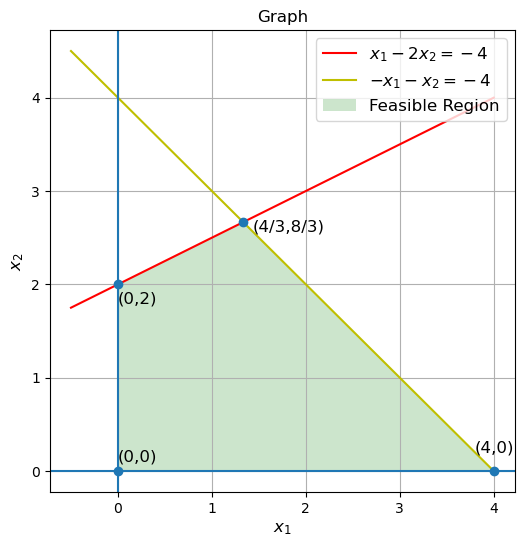

In [332]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
x = np.linspace(-1/2,4,100)
y = (x+4)/2
z= -x+4
min_y_z=[]
for i in range(len(y)):
    min_y_z.append(min([y[i],z[i]]))
min_y_z=np.array(min_y_z)
ax.plot(x, y, '-r', label='$x_1-2x_2 = -4$')
ax.plot(x, z, '-y', label='$-x_1-x_2 = -4$')
ax.plot([0,0,4/3,4],[0,2,8/3,0],'o')
ax.axhline(y=0, xmin=-4, xmax=4)
ax.axvline(x=0, ymin=0, ymax=8)

ax.set_xlabel('$x_1$',fontsize=12)
ax.set_ylabel('$x_2$',fontsize=12)
ax.set_title('Graph',fontsize=12)
ax.text(0,0.1,'(0,0)',fontsize=12)
ax.text(0,1.8,'(0,2)',fontsize=12)
ax.text(4/3+0.1,8/3-0.1,'(4/3,8/3)',fontsize=12)
ax.text(4-0.2,0+0.2,'(4,0)',fontsize=12)
ax.fill_between(x,0,min_y_z,where=(x >= 0),facecolor="green", alpha=0.2,label="Feasible Region")
ax.legend(loc='upper right',fontsize=12)
ax.grid()

In [339]:
epsilon = 1e-6

def createbarA(A,S,X):
    fr=np.hstack((A,np.zeros((4,4)),np.zeros((4,6))))
    sr=np.hstack((np.zeros((6,6)),A.transpose(),np.identity(6)))
    tr=np.hstack((S,np.zeros((6,4)),X))
    barA=np.vstack((fr,sr,tr))
#     print(barA)
    return barA

def determineStepsize(x,s,delta_x,delta_s,r):
    data_1=[1]
    for i in range(6):
        if delta_x[i,0]<0:
            data_1.append((0.99*x[i,0])/-delta_x[i,0])
    alpha_p=np.min(data_1)
    
    data_2=[1]
    for j in range(6):
        if delta_s[j,0]<0:
            data_2.append((0.99*s[j,0])/-delta_s[j,0])
    alpha_d=np.min(data_2)
    return alpha_d,alpha_p

A=[[1,1,0,-1,0,0],[1,-1,0,0,1,0],[-1,-1,1,0,0,0],[7,12,0,0,0,-1]]
b=[[11],[5],[0],[35]]
c=[[4],[5],[6],[0],[0],[0]]
A=np.array(A)
b=np.array(b)
c=np.array(c)
x0,y0,s0=[[1],[2],[3],[4],[5],[6]],[[9],[10],[11],[12]],[[5],[6],[7],[8],[9],[10]]

s0=np.array(s0)
S=np.diag(s0[:,0])

x0=np.array(x0)
X=np.diag(x0[:,0])

y0=np.array(y0)

e=np.ones((6,1))

n=6
mu0=(x0.transpose().dot(s0)/10/n)[0,0]

# e=np.ones((4,1))
# r1=b-A.dot(x0)
# r2=c-A.transpose().dot(y0)-s0
# r3=mu0*e-X.dot(S).dot(e)
# r=np.vstack((r1,r2,r3))

k=0


x=x0
s=s0
y=y0

while True:
    if np.sqrt(r1.transpose().dot(r1))<epsilon and np.sqrt(r2.transpose().dot(r2))<epsilon and x.transpose().dot(s)<epsilon:
        break
    
    mu=(x.transpose().dot(s)/10/n)[0,0]
    if mu < epsilon*mu0:
        break
    
    barA=createbarA(A,S,X)
    r1=b-A.dot(x)
    r2=c-A.transpose().dot(y)-s
    r3=mu*e-X.dot(S).dot(e)
    r=np.vstack((r1,r2,r3))
    
    delta=np.linalg.inv(barA).dot(r)
    delta_x=delta[0:6,0].reshape(6,1)
    delta_y=delta[6:10,0].reshape(4,1)
    delta_s=delta[10:16,0].reshape(6,1)
    
    alpha_d,alpha_p=determineStepsize(x,s,delta_x,delta_s,r)
#     alpha_d = determineStepsize(s,delta_s)
#     alpha_p = determineStepsize(x,delta_x)
#     print("k = ",k,"alpha_d = ",alpha_d,"alpha_p = ",alpha_p)
    
    x=x+alpha_p*delta_x
    X=np.diag(x[:,0])
    
    y=y+alpha_d*delta_y
    
    s=s+alpha_d*delta_s
    S=np.diag(s[:,0])

    print("k:",k,"\nx=\n",x)
    print("\n")

    k=k+1

k: 0 
x=
 [[1.45139009]
 [2.07290936]
 [3.52429945]
 [0.04      ]
 [4.99521089]
 [6.29772677]]


k: 1 
x=
 [[4.95741347e+00]
 [4.71847766e-01]
 [5.42926123e+00]
 [3.04752222e-03]
 [4.99521089e-02]
 [1.00088894e+01]]


k: 2 
x=
 [[6.79547986e+00]
 [1.98148027e+00]
 [8.77696014e+00]
 [2.97079708e-03]
 [4.99521089e-04]
 [3.82011312e+01]]


k: 3 
x=
 [[7.99950688e+00]
 [3.00336797e+00]
 [1.10028749e+01]
 [2.87485043e-03]
 [3.86108627e-03]
 [5.70369638e+01]]


k: 4 
x=
 [[7.99824013e+00]
 [3.00309260e+00]
 [1.10013327e+01]
 [1.33272333e-03]
 [4.85247141e-03]
 [5.70247921e+01]]


k: 5 
x=
 [[7.99946010e+00]
 [3.00059386e+00]
 [1.10000540e+01]
 [5.39536674e-05]
 [1.13376120e-03]
 [5.70033470e+01]]


k: 6 
x=
 [[7.99994590e+00]
 [3.00005952e+00]
 [1.10000054e+01]
 [5.41693494e-06]
 [1.13625671e-04]
 [5.70003355e+01]]


k: 7 
x=
 [[7.99999458e+00]
 [3.00000596e+00]
 [1.10000005e+01]
 [5.41796171e-07]
 [1.13764253e-05]
 [5.70000336e+01]]




In [360]:
epsilon = 1e-6

def createbarA(A,S,X,m,n):
    fr=np.hstack((A,np.zeros((n,n)),np.zeros((n,m))))
    sr=np.hstack((np.zeros((m,m)),A.transpose(),np.identity(m)))
    tr=np.hstack((S,np.zeros((m,n)),X))
    barA=np.vstack((fr,sr,tr))
#     print(barA)
    return barA

def determineStepsize(x,s,delta_x,delta_s,r,m,n):
    data_1=[1]
    for i in range(m):
        if delta_x[i,0]<0:
            data_1.append((0.99*x[i,0])/-delta_x[i,0])
    alpha_p=np.min(data_1)
    
    data_2=[1]
    for j in range(m):
        if delta_s[j,0]<0:
            data_2.append((0.99*s[j,0])/-delta_s[j,0])
    alpha_d=np.min(data_2)
    return alpha_d,alpha_p

A=[[12,13,4,6,0,0,0,0,0,0,0,0],
   [0,0,0,0,6,4,10,11,0,0,0,0],
   [0,0,0,0,0,0,0,0,10,9,12,4],
   [12,0,0,0,6,0,0,0,10,0,0,0],
   [0,13,0,0,0,4,0,0,0,9,0,0],
   [0,0,4,0,0,0,10,0,0,0,12,0]]
b=[[500],[700],[800],[400],[900],[200]]
c=[[12],[13],[4],[6],[6],[4],[10],[11],[10],[9],[12],[4]]
A=np.array(A)
b=np.array(b)
c=np.array(c)

n=np.size(A,0) #4
m=np.size(A,1) #6

x0=[[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12]]
y0=[[1],[2],[3],[4],[5],[6]]                                                               
s0=[[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12]]                                                            

s0=np.array(s0)
S=np.diag(s0[:,0])

x0=np.array(x0)
X=np.diag(x0[:,0])

y0=np.array(y0)

e=np.ones((m,1))

n_dim=m
mu0=(x0.transpose().dot(s0)/10/n_dim)[0,0]

# e=np.ones((4,1))
# r1=b-A.dot(x0)
# r2=c-A.transpose().dot(y0)-s0
# r3=mu0*e-X.dot(S).dot(e)
# r=np.vstack((r1,r2,r3))

k=0


x=x0
s=s0
y=y0

while True:
    if np.sqrt(r1.transpose().dot(r1))<epsilon and np.sqrt(r2.transpose().dot(r2))<epsilon and x.transpose().dot(s)<epsilon:
        break
    
    mu=(x.transpose().dot(s)/10/n_dim)[0,0]
    if mu < epsilon*mu0:
        break
    
    barA=createbarA(A,S,X,m,n)
    r1=b-A.dot(x)
    r2=c-A.transpose().dot(y)-s
    r3=mu*e-X.dot(S).dot(e)
    r=np.vstack((r1,r2,r3))
    
    delta=np.linalg.inv(barA).dot(r)
    delta_x=delta[0:m,0].reshape(m,1)
    delta_y=delta[m:m+n,0].reshape(n,1)
    delta_s=delta[m+n:2*m+n,0].reshape(m,1)
    
    alpha_d,alpha_p=determineStepsize(x,s,delta_x,delta_s,r,m,n)
#     alpha_d = determineStepsize(s,delta_s)
#     alpha_p = determineStepsize(x,delta_x)
#     print("k = ",k,"alpha_d = ",alpha_d,"alpha_p = ",alpha_p)
    
    x=x+alpha_p*delta_x
    X=np.diag(x[:,0])
    
    y=y+alpha_d*delta_y
    
    s=s+alpha_d*delta_s
    S=np.diag(s[:,0])

    print("k:",k,"\nx=\n",x)
    print("\n")

    k=k+1

k: 0 
x=
 [[ 2.96367494]
 [18.20357957]
 [ 0.03      ]
 [ 5.40215872]
 [12.14806841]
 [15.72094135]
 [ 9.29320467]
 [22.51106938]
 [16.87101218]
 [28.01388043]
 [ 9.44706923]
 [16.03170798]]


k: 1 
x=
 [[ 3.78524488]
 [31.68795553]
 [ 2.34181873]
 [ 5.54439409]
 [19.93906469]
 [24.04571603]
 [ 8.96500756]
 [35.86660656]
 [23.49426733]
 [43.54152377]
 [ 8.41522079]
 [18.05024083]]


k: 2 
x=
 [[ 4.43964967]
 [30.54854165]
 [ 2.90185469]
 [ 6.33095729]
 [19.73311436]
 [26.45385645]
 [ 8.80911143]
 [35.24497943]
 [22.83255178]
 [44.11705919]
 [ 8.35845558]
 [18.57987063]]


k: 3 
x=
 [[ 4.84160446]
 [28.46185082]
 [ 3.92937518]
 [ 9.36319752]
 [20.65434126]
 [31.22851883]
 [ 8.77964784]
 [33.03303625]
 [21.79746989]
 [45.009096  ]
 [ 8.04050174]
 [20.11435404]]


k: 4 
x=
 [[ 5.2785517 ]
 [27.0936935 ]
 [ 4.89151104]
 [10.81221999]
 [20.16068599]
 [37.64381978]
 [ 8.49492907]
 [31.22830129]
 [21.56932637]
 [44.13407837]
 [ 7.95705543]
 [22.90384146]]


k: 5 
x=
 [[ 5.6761493 ]
 [25.85941

In [368]:
epsilon = 1e-6

iterationNo=[]
iterationX1=[]
iterationX2=[]
iterationX3=[]
iterationX4=[]
iterationX5=[]
iterationX6=[]
iterationX7=[]
iterationX8=[]
iterationX9=[]
iterationX10=[]
iterationX11=[]
iterationX12=[]


def createbarA(A,S,X,m,n):
    fr=np.hstack((A,np.zeros((n,n)),np.zeros((n,m))))
    sr=np.hstack((np.zeros((m,m)),A.transpose(),np.identity(m)))
    tr=np.hstack((S,np.zeros((m,n)),X))
    barA=np.vstack((fr,sr,tr))
#     print(barA)
    return barA

def determineStepsize(x,s,delta_x,delta_s,r,m,n):
    data_1=[1]
    for i in range(m):
        if delta_x[i,0]<0:
            data_1.append((0.99*x[i,0])/-delta_x[i,0])
    alpha_p=np.min(data_1)
    
    data_2=[1]
    for j in range(m):
        if delta_s[j,0]<0:
            data_2.append((0.99*s[j,0])/-delta_s[j,0])
    alpha_d=np.min(data_2)
    return alpha_d,alpha_p

A=[[1,1,1,1,0,0,0,0,0,0,0,0],
   [0,0,0,0,1,1,1,1,0,0,0,0],
   [0,0,0,0,0,0,0,0,1,1,1,1],
   [1,0,0,0,1,0,0,0,1,0,0,0],
   [0,1,0,0,0,1,0,0,0,1,0,0],
   [0,0,1,0,0,0,1,0,0,0,1,0]]
b=[[500],[700],[800],[400],[900],[200]]
c=[[12],[13],[4],[6],[6],[4],[10],[11],[10],[9],[12],[4]]
A=np.array(A)
b=np.array(b)
c=np.array(c)

n=np.size(A,0) #4
m=np.size(A,1) #6

x0=[[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]]
y0=[[1],[2],[3],[4],[5],[6]]                                                               
s0=[[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12]]                                                            

s0=np.array(s0)
S=np.diag(s0[:,0])

x0=np.array(x0)
X=np.diag(x0[:,0])

y0=np.array(y0)

e=np.ones((m,1))

n_dim=m
mu0=(x0.transpose().dot(s0)/10/n_dim)[0,0]

# e=np.ones((4,1))
# r1=b-A.dot(x0)
# r2=c-A.transpose().dot(y0)-s0
# r3=mu0*e-X.dot(S).dot(e)
# r=np.vstack((r1,r2,r3))

k=1


x=x0
s=s0
y=y0

while True:
    iterationNo.append(k)
    iterationX1.append(x[0,0])
    iterationX2.append(x[1,0])
    iterationX3.append(x[2,0])
    iterationX4.append(x[3,0])
    iterationX5.append(x[4,0])
    iterationX6.append(x[5,0])
    iterationX7.append(x[6,0])
    iterationX8.append(x[7,0])
    iterationX9.append(x[8,0])
    iterationX10.append(x[9,0])
    iterationX11.append(x[10,0])
    iterationX12.append(x[11,0])
    
    if np.sqrt(r1.transpose().dot(r1))<epsilon and np.sqrt(r2.transpose().dot(r2))<epsilon and x.transpose().dot(s)<epsilon:
        break
    
    mu=(x.transpose().dot(s)/10/n_dim)[0,0]
    if mu < epsilon*mu0:
        break
    
    barA=createbarA(A,S,X,m,n)
    r1=b-A.dot(x)
    r2=c-A.transpose().dot(y)-s
    r3=mu*e-X.dot(S).dot(e)
    r=np.vstack((r1,r2,r3))
    
    delta=np.linalg.inv(barA).dot(r)
    delta_x=delta[0:m,0].reshape(m,1)
    delta_y=delta[m:m+n,0].reshape(n,1)
    delta_s=delta[m+n:2*m+n,0].reshape(m,1)
    
    alpha_d,alpha_p=determineStepsize(x,s,delta_x,delta_s,r,m,n)
#     alpha_d = determineStepsize(s,delta_s)
#     alpha_p = determineStepsize(x,delta_x)
#     print("k = ",k,"alpha_d = ",alpha_d,"alpha_p = ",alpha_p)
    
    x=x+alpha_p*delta_x
    X=np.diag(x[:,0])
    
    y=y+alpha_d*delta_y
    
    s=s+alpha_d*delta_s
    S=np.diag(s[:,0])

#     print("k:",k,"\nx=\n",x)
#     print("\n")
    print(12*x[0,0]+13*x[1,0]+4*x[2,0]+6*x[3,0]+6*x[4,0]+4*x[5,0]+10*x[6,0]+11*x[7,0]+10*x[8,0]+9*x[9,0]+12*x[10,0]+4*x[11,0])
    k=k+1
    
Table={"k":iterationNo,"$x^{1}$":iterationX1,"$x^{2}$":iterationX2,"$x^{3}$":iterationX3,"$x^{4}$":iterationX4,"$x^{5}$":iterationX5,"$x^{6}$":iterationX6,"$x^{7}$":iterationX7,"$x^{8}$":iterationX8,"$x^{9}$":iterationX9,"$x^{10}$":iterationX10,"$x^{11}$":iterationX11,"$x^{12}$":iterationX12}
pd.DataFrame(Table)

477.1283901116516
17006.03586137158
14777.25597725168
14040.73771592918
13849.779929011516
12092.562465476682
12011.553066394186
12001.161182585238
12000.133117338593
12000.013276223483
12000.001327392842
12000.000132737056
12000.000013273682


,k,$x^{1}$,$x^{2}$,$x^{3}$,$x^{4}$,$x^{5}$,$x^{6}$,$x^{7}$,$x^{8}$,$x^{9}$,$x^{10}$,$x^{11}$,$x^{12}$
0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000
1,2,1.584866,9.111796,0.010000,3.889755,4.610297,6.625717,3.034322e+00,4.598830e+00,5.286244,6.425765,4.164336e+00,5.129196
2,3,35.139139,328.336615,0.631847,135.892398,164.631198,294.966903,7.708588e+01,1.633160e+02,200.229662,276.696482,1.222823e+02,200.791579
3,4,52.765386,205.289276,1.557649,240.387689,147.891496,478.887179,7.158816e+01,1.633160e+00,199.343118,215.823545,1.268542e+02,257.979150
4,5,115.054514,2.052893,21.381672,361.510922,86.415167,559.908161,5.334295e+01,3.337186e-01,198.530319,338.038946,1.252754e+02,138.155360
5,6,108.760878,0.020529,38.430004,352.788589,86.520614,565.367169,4.775870e+01,3.535168e-01,204.718508,334.612302,1.138113e+02,146.857894
6,7,129.200162,2.853977,195.690035,172.255825,35.472098,663.479481,4.775870e-01,5.708338e-01,235.327740,233.666542,3.832378e+00,327.173341
7,8,138.715625,0.853455,199.878502,160.552418,7.327223,692.501734,8.317409e-02,8.786947e-02,253.957152,206.644812,3.832378e-02,339.359713
8,9,139.424174,0.162400,199.955687,160.457740,0.073272,699.885030,2.004310e-02,2.165431e-02,260.502554,199.952570,2.426991e-02,339.520606
9,10,139.521442,0.013547,199.995306,160.469706,0.026457,699.969295,2.038862e-03,2.208914e-03,260.452101,200.017158,2.655489e-03,339.528086
